# Erlang B (M/M/c/c model)

* There is no waiting room in this model (system size = number of operators).
* If there is no free operator on client arrival, the client will be blocked.
* We have E[W]=0, E[N<sub>Q</sub>]=0, E[V]=E[S] and E[N]/c=&rho;.

## Importing modules

In [1]:
# Erlang module
from queuesim.analytic import erlang_b_table

# Plotting modules
import matplotlib.pyplot as plt
import matplotlib.ticker as formater
import seaborn as sns

# Defining general plot style
sns.set()
percent_formater = formater.PercentFormatter(xmax=1, decimals=0)

## Helper function for plotting Erlang B results

In [2]:
def erlang_b_plot(results, x, title: str, x_label: str, x_is_percent=False) -> None:
    fig, ax = plt.subplots(figsize=(16, 9))

    ax.plot(x, results["P(blocked)"], 'r')
    ax.tick_params(axis='y', labelcolor='r')
    ax.set_xlabel(x_label)
    ax.set_ylabel("P(blocked)", color='r')
    if x_is_percent: ax.xaxis.set_major_formatter(percent_formater)
    ax.yaxis.set_major_formatter(percent_formater)

    ax = ax.twinx()
    ax.plot(x, results["rho_real"], 'g')
    ax.tick_params(axis='y', labelcolor='g')
    ax.set_ylabel("Real utilization $\\rho$", color='g')
    ax.yaxis.set_major_formatter(percent_formater)

    ax.set_title(title)

## P(blocked) as a function of the workload

In [3]:
# Number of operators
c = 10

# Workload range
a_range = range(26)

# Erlang B results for different values of a
results = erlang_b_table([(a, c) for a in a_range])

# Display results table
results

,a,c,rho_offered,rho_real,E[N],P(blocked)
0,0,10,0.0,0.000000,0.000000,0.000000e+00
1,1,10,0.1,0.100000,1.000000,1.013777e-07
2,2,10,0.2,0.199992,1.999924,3.819017e-05
3,3,10,0.3,0.299757,2.997569,8.103881e-04
4,4,10,0.4,0.397877,3.978770,5.307549e-03
5,5,10,0.5,0.490808,4.908077,1.838457e-02
6,6,10,0.6,0.574115,5.741149,4.314184e-02
7,7,10,0.7,0.644881,6.448814,7.874088e-02
8,8,10,0.8,0.702671,7.026711,1.216611e-01
9,9,10,0.9,0.748833,7.488331,1.679632e-01


## Plot results

In [4]:
# Optional: Interactive diagram mode
# Run "pip install ipympl" first
# %matplotlib ipympl

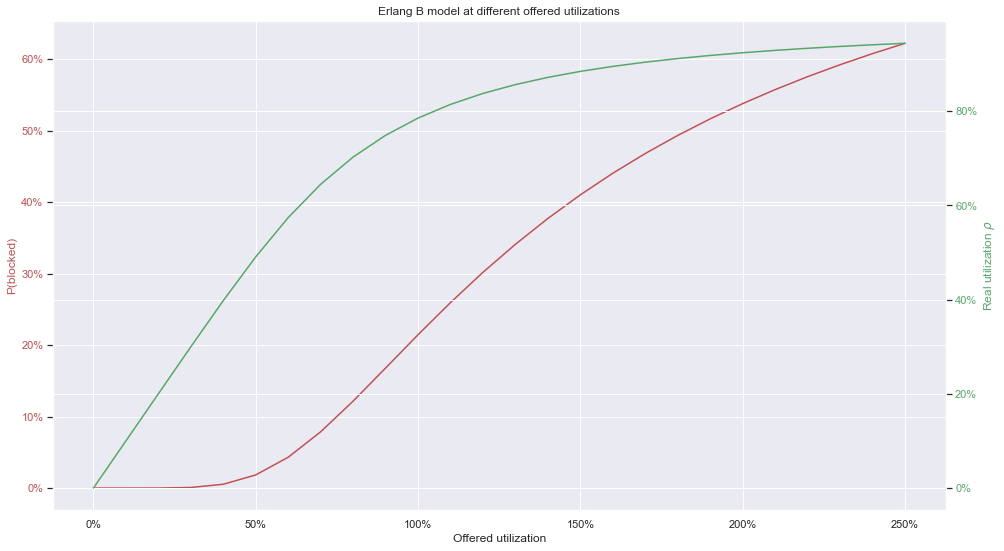

In [5]:
erlang_b_plot(results, results["rho_offered"], "Erlang B model at different offered utilizations", "Offered utilization", True)

At an offered utilization of 100% about 21% of the arriving clients will be blocked.

## P(blocked) as a function of c

Now the offered utilization (=a/c) will be fixed at 80%. (a=0.8*c)

In [6]:
# Fixed offered utilization
rho = 0.8

# Number of operators range
c_range = range(1, 21)

# Erlang B results for different values of c
results = erlang_b_table([(0.8 * c, c) for c in c_range])

# Display results table
results

,a,c,rho_offered,rho_real,E[N],P(blocked)
0,0.8,1,0.8,0.444444,0.444444,0.444444
1,1.6,2,0.8,0.536082,1.072165,0.329897
2,2.4,3,0.8,0.585275,1.755825,0.268406
3,3.2,4,0.8,0.617484,2.469936,0.228145
4,4.0,5,0.8,0.640747,3.203733,0.199067
5,4.8,6,0.8,0.658576,3.951458,0.176780
6,5.6,7,0.8,0.672802,4.709611,0.158998
7,6.4,8,0.8,0.684485,5.475879,0.144394
8,7.2,9,0.8,0.694293,6.248641,0.132133
9,8.0,10,0.8,0.702671,7.026711,0.121661


## Plot results

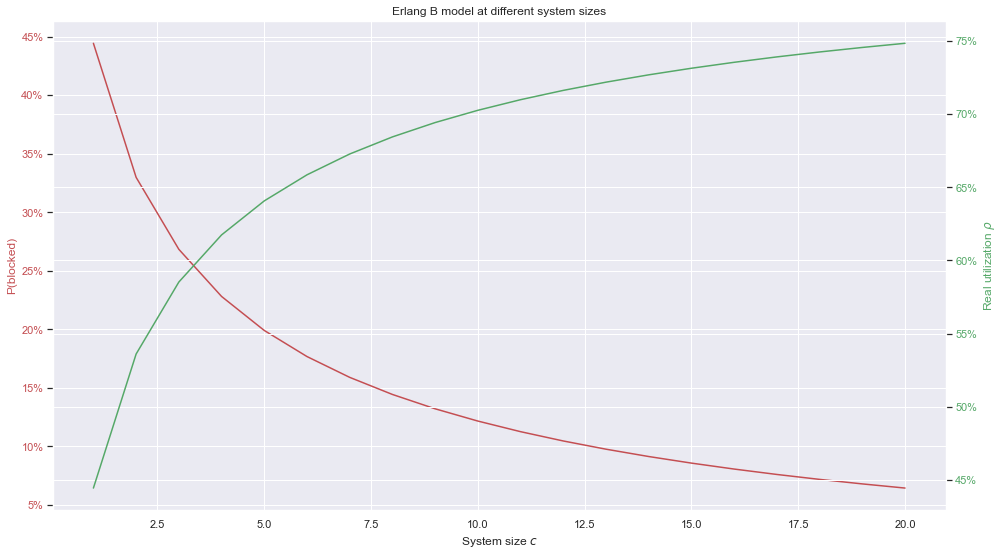

In [7]:
erlang_b_plot(results, results["c"], "Erlang B model at different system sizes", "System size $c$")

* On larger systems it is less likely to be blocked at the same offered utilization (Economy of scale).
* Due to less blocked clients, the real utilization increases.